In [2]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history[metric])
  plt.plot(history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteT71KUQ/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteT71KUQ/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteT71KUQ/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

# Sample model

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 680s 2s/step - loss: 0.6489 - accuracy: 0.5522 - val_loss: 0.4735 - val_accuracy: 0.7484
Epoch 2/10
391/391 [==============================] - 673s 2s/step - loss: 0.4126 - accuracy: 0.8127 - val_loss: 0.3763 - val_accuracy: 0.8458
Epoch 3/10
391/391 [==============================] - 647s 2s/step - loss: 0.3481 - accuracy: 0.8473 - val_loss: 0.3565 - val_accuracy: 0.8432
Epoch 4/10
391/391 [==============================] - 664s 2s/step - loss: 0.3227 - accuracy: 0.8597 - val_loss: 0.3350 - val_accuracy: 0.8557
Epoch 5/10
391/391 [==============================] - 664s 2s/step - loss: 0.3129 - accuracy: 0.8630 - val_loss: 0.3315 - val_accuracy: 0.8479
Epoch 6/10
391/391 [==============================] - 669s 2s/step - loss: 0.3083 - accuracy: 0.8660 - val_loss: 0.3344 - val_accuracy: 0.8557
Epoch 7/10
391/391 [==============================] - 733s 2s/step - loss: 0.3059 - accuracy: 0.8692 - val_loss: 0.3268 - val_accuracy: 0.8557

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 159s 407ms/step - loss: 0.3287 - accuracy: 0.8486
Test Loss: 0.3286716341972351
Test Accuracy: 0.8485999703407288


# Models

Use this cell to change learning rates and optimizer.

In [3]:
# learning rate
learning_rate = 0.0001

# optimizers
optimizer = tf.keras.optimizers.Adam(learning_rate) # adam
# optimizer = tf.keras.optimizers.RMSprop(learning_rate) # rms prop

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

# All Histories
I ran these models in different notebooks, and these are the results I got. As you can see, I have provided the structure for the different models above.

In [ ]:
adam_lr0point0001 = {'loss': [0.5680782198905945,
  0.37313956022262573,
  0.3439830541610718,
  0.3261817395687103,
  0.3189975917339325,
  0.3166782259941101,
  0.3111852705478668,
  0.3112495243549347,
  0.30704164505004883,
  0.30807697772979736],
 'accuracy': [0.6489599943161011,
  0.8325600028038025,
  0.8497200012207031,
  0.8600000143051147,
  0.8631600141525269,
  0.8635600209236145,
  0.8683599829673767,
  0.8678399920463562,
  0.8690800070762634,
  0.8684800267219543],
 'val_loss': [0.422672837972641,
  0.3576369881629944,
  0.3426472246646881,
  0.33822107315063477,
  0.33884942531585693,
  0.3330228924751282,
  0.3420053720474243,
  0.3349396884441376,
  0.34213384985923767,
  0.32692834734916687],
 'val_accuracy': [0.8239583373069763,
  0.8447916507720947,
  0.8557291626930237,
  0.8473958373069763,
  0.8531249761581421,
  0.8520833253860474,
  0.8385416865348816,
  0.8447916507720947,
  0.859375,
  0.8557291626930237]}

adam_lr0point001 = {'loss': [0.4931967556476593,
  0.3689972758293152,
  0.3440026044845581,
  0.32643625140190125,
  0.31096401810646057,
  0.3033260107040405,
  0.2928265929222107,
  0.2895898222923279,
  0.3001909852027893,
  0.2625426948070526],
 'accuracy': [0.7431600093841553,
  0.840719997882843,
  0.8495200276374817,
  0.859279990196228,
  0.8654800057411194,
  0.8704000115394592,
  0.8737599849700928,
  0.8769199848175049,
  0.870639979839325,
  0.8888800144195557],
 'val_loss': [0.38887736201286316,
  0.37524640560150146,
  0.37622636556625366,
  0.3373768925666809,
  0.3656146824359894,
  0.3998470604419708,
  0.3433127999305725,
  0.3432309329509735,
  0.36727315187454224,
  0.360863596200943],
 'val_accuracy': [0.828125,
  0.831250011920929,
  0.809374988079071,
  0.8447916507720947,
  0.84375,
  0.8187500238418579,
  0.8479166626930237,
  0.8411458134651184,
  0.8182291388511658,
  0.8458333611488342]}

adam_lr0point01 = {'loss': [0.5304535031318665,
  0.3447605073451996,
  0.31521472334861755,
  0.29120492935180664,
  0.26779183745384216,
  0.2560882568359375,
  0.24125517904758453,
  0.22971688210964203,
  0.2185586392879486,
  0.21151454746723175],
 'accuracy': [0.6977999806404114,
  0.8464400172233582,
  0.8630399703979492,
  0.874239981174469,
  0.8863599896430969,
  0.888480007648468,
  0.8973600268363953,
  0.902679979801178,
  0.9071599841117859,
  0.9115599989891052],
 'val_loss': [0.3704848289489746,
  0.344062477350235,
  0.3238540589809418,
  0.31723707914352417,
  0.3310805857181549,
  0.30448973178863525,
  0.32424962520599365,
  0.3692307472229004,
  0.3239496052265167,
  0.3472181558609009],
 'val_accuracy': [0.8130208253860474,
  0.8447916507720947,
  0.8500000238418579,
  0.8604166507720947,
  0.8666666746139526,
  0.8671875,
  0.8531249761581421,
  0.856249988079071,
  0.8677083253860474,
  0.8588541746139526]}

RMSprop_lr0point01 = {'loss': [0.6743242740631104,
  0.42742547392845154,
  0.31814342737197876,
  0.2895452678203583,
  0.2690804600715637,
  0.252313494682312,
  0.23490600287914276,
  0.2222486287355423,
  0.2112361341714859,
  0.1971997618675232],
 'accuracy': [0.5552800297737122,
  0.7973999977111816,
  0.8627200126647949,
  0.8748800158500671,
  0.884440004825592,
  0.891759991645813,
  0.8998399972915649,
  0.9058799743652344,
  0.9104400277137756,
  0.9185199737548828],
 'val_loss': [0.5875396728515625,
  0.3520987331867218,
  0.311174213886261,
  0.3078465163707733,
  0.30641353130340576,
  0.30975526571273804,
  0.3317795991897583,
  0.34675586223602295,
  0.3737448751926422,
  0.3701225221157074],
 'val_accuracy': [0.7020833492279053,
  0.8104166388511658,
  0.8505208492279053,
  0.8609374761581421,
  0.8609374761581421,
  0.856249988079071,
  0.8651041388511658,
  0.8609374761581421,
  0.8557291626930237,
  0.848437488079071]}

RMSprop_lr0point001 = {'loss': [0.5640571713447571,
  0.4149686396121979,
  0.3813118636608124,
  0.3569355010986328,
  0.3433923125267029,
  0.34019070863723755,
  0.3272603452205658,
  0.3163672089576721,
  0.3064885437488556,
  0.2972102165222168],
 'accuracy': [0.6703199744224548,
  0.817359983921051,
  0.8348000049591064,
  0.8448799848556519,
  0.8519600033760071,
  0.8526399731636047,
  0.860480010509491,
  0.864080011844635,
  0.8711199760437012,
  0.8763599991798401],
 'val_loss': [0.4506905674934387,
  0.4209592938423157,
  0.3955337703227997,
  0.38405588269233704,
  0.33738240599632263,
  0.3623943030834198,
  0.4658891260623932,
  0.33552494645118713,
  0.325246661901474,
  0.3256091773509979],
 'val_accuracy': [0.7755208611488342,
  0.8166666626930237,
  0.8302083611488342,
  0.848437488079071,
  0.8447916507720947,
  0.856249988079071,
  0.7953125238418579,
  0.8348958492279053,
  0.8567708134651184,
  0.8614583611488342]}

RMSprop_lr0point0001 = {'loss': [0.6920579671859741,
  0.5812150239944458,
  0.41883882880210876,
  0.3661031126976013,
  0.3418676257133484,
  0.33232128620147705,
  0.324844092130661,
  0.3203403353691101,
  0.3187248110771179,
  0.31310829520225525],
 'accuracy': [0.5,
  0.6555200219154358,
  0.8083999752998352,
  0.8402000069618225,
  0.8527600169181824,
  0.8601199984550476,
  0.8632799983024597,
  0.8652799725532532,
  0.8650799989700317,
  0.8683599829673767],
 'val_loss': [0.6890013813972473,
  0.4914082884788513,
  0.3848818242549896,
  0.38482487201690674,
  0.3463643193244934,
  0.34245020151138306,
  0.34065642952919006,
  0.33605411648750305,
  0.35734593868255615,
  0.3460310995578766],
 'val_accuracy': [0.49166667461395264,
  0.7796875238418579,
  0.8374999761581421,
  0.8479166626930237,
  0.8505208492279053,
  0.8401041626930237,
  0.8505208492279053,
  0.846875011920929,
  0.8598958253860474,
  0.8583333492279053]}

In [ ]:
allHistories = [adam_lr0point01, adam_lr0point001, adam_lr0point0001,
                RMSprop_lr0point01, RMSprop_lr0point001, RMSprop_lr0point0001]

# get history with the best validation accuracy
bestHistory = max(allHistories, key=lambda x: x['val_accuracy'][-1])
bestHistory

{'loss': [0.5640571713447571,
  0.4149686396121979,
  0.3813118636608124,
  0.3569355010986328,
  0.3433923125267029,
  0.34019070863723755,
  0.3272603452205658,
  0.3163672089576721,
  0.3064885437488556,
  0.2972102165222168],
 'accuracy': [0.6703199744224548,
  0.817359983921051,
  0.8348000049591064,
  0.8448799848556519,
  0.8519600033760071,
  0.8526399731636047,
  0.860480010509491,
  0.864080011844635,
  0.8711199760437012,
  0.8763599991798401],
 'val_loss': [0.4506905674934387,
  0.4209592938423157,
  0.3955337703227997,
  0.38405588269233704,
  0.33738240599632263,
  0.3623943030834198,
  0.4658891260623932,
  0.33552494645118713,
  0.325246661901474,
  0.3256091773509979],
 'val_accuracy': [0.7755208611488342,
  0.8166666626930237,
  0.8302083611488342,
  0.848437488079071,
  0.8447916507720947,
  0.856249988079071,
  0.7953125238418579,
  0.8348958492279053,
  0.8567708134651184,
  0.8614583611488342]}

(0.0, 0.577399519085884)

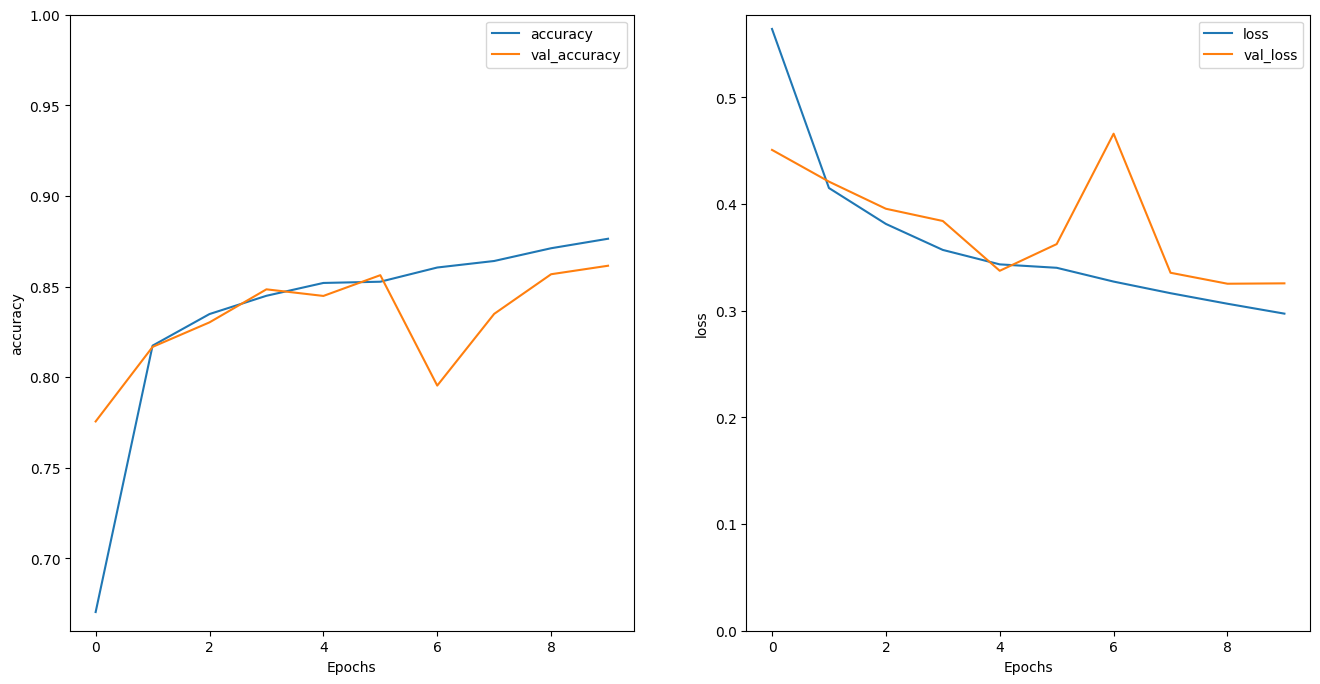

In [ ]:
adamHistories = [adam_lr0point01, adam_lr0point001, adam_lr0point0001]
rmsHistories = [RMSprop_lr0point01, RMSprop_lr0point001, RMSprop_lr0point0001]

allHistories = adamHistories + rmsHistories

# get history with the best validation accuracy
bestHistory = max(allHistories, key=lambda x: x['val_accuracy'][-1])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(bestHistory, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(bestHistory, 'loss')
plt.ylim(0, None)

The best combination was RMS Propogation with lr = 0.001

In [ ]:
import pandas as pd

# create data dictionary for table columns
data = {
    'Adam': list(),
    'RMS Prop.': list()
}

def getString(history):
  acc = history.get('accuracy')[-1]
  val_acc = history.get('val_accuracy')[-1]
  return "Acc.: {:.3f}, Val. Acc.: {:.3f}".format(acc, val_acc)

# put correct display vals in data dictionary
for item in adamHistories:
  data.get('Adam').append(getString(item))
for item in rmsHistories:
  data.get('RMS Prop.').append(getString(item))

# name rows
row_labels = ['lr = 0.01', 'lr = 0.001', 'lr = 0.0001']

# make pandas data frame
df = pd.DataFrame(data, index=row_labels)
print(df)

                                      Adam                      RMS Prop.
lr = 0.01    Acc.: 0.912, Val. Acc.: 0.859  Acc.: 0.919, Val. Acc.: 0.848
lr = 0.001   Acc.: 0.889, Val. Acc.: 0.846  Acc.: 0.876, Val. Acc.: 0.861
lr = 0.0001  Acc.: 0.868, Val. Acc.: 0.856  Acc.: 0.868, Val. Acc.: 0.858
